#### In this notebook, we'll use some function to evaluate our model predictions, in terms of lean accuracy, confusion matrices and more. <br>
Change variable names for different model outputs

Start by handler functions for pickle files

In [2]:
import pickle
def writePickle(Variable, fname):
    filename = fname +".pkl"
    f = open("pickle_vars/"+filename, 'wb')
    pickle.dump(Variable, f)
    f.close()
def readPickle(fname):
    filename = "pickle_vars/"+fname +".pkl"
    f = open(filename, 'rb')
    obj = pickle.load(f)
    f.close()
    return obj

In [340]:
# depending on the classification task, select one of the test label set and the label dictionary pairs below:

# for GENRE classification
label_dictionary = readPickle(str("id2"+"genre"))
test_labels = readPickle("sub_word/y_te_genre_equal")

# for ARTIST classification
label_dictionary = readPickle(str("id2"+"artist"))
test_labels = readPickle("sub_word/y_te_artist_equal")

### 1- Confusion matrix, fscores, prediction accuracy

In [353]:
# get the four best models for sub_word & character embeddings (genre label)

sub_word_models_genre = ["PredictionsEqual_sub_word_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_1024dense_outputs_3674length",
                         "PredictionsEqual_sub_word_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[3, 3, 3]_112filters_1024dense_outputs_3674length",
                         "PredictionsEqual_sub_word_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_512dense_outputs_3674length",
                         "PredictionsEqual_sub_word_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[5, 5, 5]_112filters_1024dense_outputs_3674length"]

character_models_genre = ["PredictionsEqual_char_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_256dense_outputs_11111length",
                          "PredictionsEqual_char_pre_trained_genre_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_512dense_outputs_11111length",
                          "PredictionsEqual_char_pre_trained_genre_30batch_40epoch_4Stop_filters=[7, 7, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_256dense_outputs_11111length",
                          "PredictionsEqual_char_pre_trained_genre_30batch_40epoch_4Stop_filters=[7, 7, 3, 3, 3, 3]_pools=[7, 7, 7]_256filters_256dense_outputs_11111length"]

# get the four best models for sub_word & character embeddings (artist label)

sub_word_models_artist = ["PredictionsEqual_sub_word_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_3072dense_outputs_3674length",
                          "PredictionsEqual_sub_word_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[3, 3, 3]_112filters_3072dense_outputs_3674length",
                          "PredictionsEqual_sub_word_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[9, 9, 9]_112filters_512dense_outputs_3674length",
                          "PredictionsEqual_sub_word_pre_trained_artist_30batch_40epoch_4Stop_filters=[7, 7, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_3072dense_outputs_3674length"]

character_models_artist = ["PredictionsEqual_char_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_256filters_2048dense_outputs_11111length",
                           "PredictionsEqual_char_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_4096dense_outputs_11111length",
                           "PredictionsEqual_char_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_3072dense_outputs_11111length",
                           "PredictionsEqual_char_pre_trained_artist_30batch_40epoch_4Stop_filters=[3, 3, 3, 3, 3, 3]_pools=[7, 7, 7]_112filters_512dense_outputs_11111length"]


In [390]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

import seaborn as sn
import matplotlib.pyplot as plt

from pylab import savefig

import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)


def prediction(model_type, label_type, prediction_file_name):
    
    from sklearn.metrics import confusion_matrix
    
    valid_models = {"sub_word", "character", "word"}
    if model_type not in valid_models:
        raise ValueError("results: status must be one of %r." % valid_models)
        
    valid_labels = {"artist", "genre"}
    if label_type not in valid_labels:
        raise ValueError("results: status must be one of %r." % valid_labels)
        
    test_labels = readPickle(str(model_type+"/"+"y_te_"+label_type+"_equal"))
    
    predictions = readPickle(str("predictions/"+prediction_file_name))
    label_dictionary = readPickle(str("id2"+label_type))
    
    
    truth = []
    for a, b in zip(np.argmax(predictions, axis=-1), np.argmax(test_labels, axis=-1)):
        if a == b:
            truth.append(True)
        else:
            truth.append(False)
    test_accuracy_score = sum(truth)/len(truth)
    

    
    # class-based f-scores
    
    if label_type == "genre":
        index = [label_dictionary[i+1] for i in range(12)]
    else:
        index = [label_dictionary[i+1] for i in range(120)]
    
    #indices = [label_dictionary[]]

    precision, recall, fscore, support = score(np.argmax(test_labels, axis=-1), np.argmax(predictions, axis=-1))

    class_based_scores = pd.DataFrame(list(zip(precision, recall, fscore, support)), index = index,
                                              columns =['Precision', 'Recall', 'Fscore', 'Support'])
    
    # seaborn confusion matrix plot
    
    y_true = list()
    y_pred = list()
    for a, b in zip(np.argmax(predictions, axis=-1), np.argmax(test_labels, axis=-1)):
        y_true.append(label_dictionary[b+1])
        y_pred.append(label_dictionary[a+1])
    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=0.9)#for label size
    
    yticks = df_cm.index
    plt.yticks(rotation=145)
    confusion_graph = sn.heatmap(df_cm, cmap="Blues",xticklabels=yticks, annot=True,annot_kws={"size": 11})# font size
    confusion_graph.set_xticklabels(confusion_graph.get_xticklabels(), rotation = 60, fontsize = 11)
    figure = confusion_graph.get_figure()    
    figure.savefig('sn_confusion.png', dpi=100, bbox_inches = 'tight')
    
    
    return test_accuracy_score, class_based_scores, figure





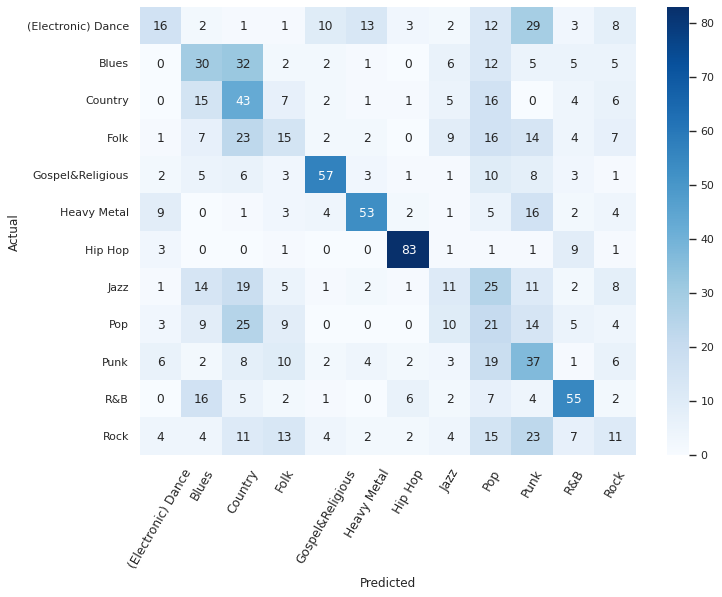

In [411]:
# select which prediction file you want to work with and then run the function to save several evaluation metrics
# the confusion matrix heatmap will be displayed
prediction_file_name = sub_word_models_genre[0]

test_accuracy_score, class_based_scores, confusion_matrix = prediction("sub_word", "genre", prediction_file_name)

In [412]:
test_accuracy_score

0.36

In [413]:
class_based_scores

,Precision,Recall,Fscore,Support
(Electronic) Dance,0.355556,0.16,0.220690,100
Blues,0.288462,0.30,0.294118,100
Country,0.247126,0.43,0.313869,100
Folk,0.211268,0.15,0.175439,100
Gospel&Religious,0.670588,0.57,0.616216,100
Heavy Metal,0.654321,0.53,0.585635,100
Hip Hop,0.821782,0.83,0.825871,100
Jazz,0.200000,0.11,0.141935,100
Pop,0.132075,0.21,0.162162,100
Punk,0.228395,0.37,0.282443,100


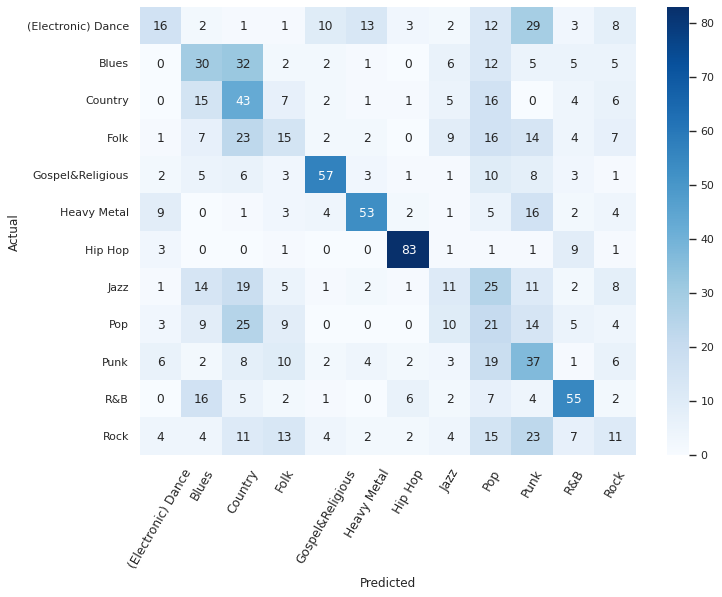

In [414]:
confusion_matrix

### 2- Add accuracy and loss graphs

In [296]:
# pick a history file name from any of the trained models

#file_nm = 'pickle_vars/history/'+'Equal'+character_models_genre[0][17:]
file_nm = 'pickle_vars/history/'+'Equal'+sub_word_models_artist[0][17:]

with open(file_nm, 'rb') as file:
    history=pickle.load(file)

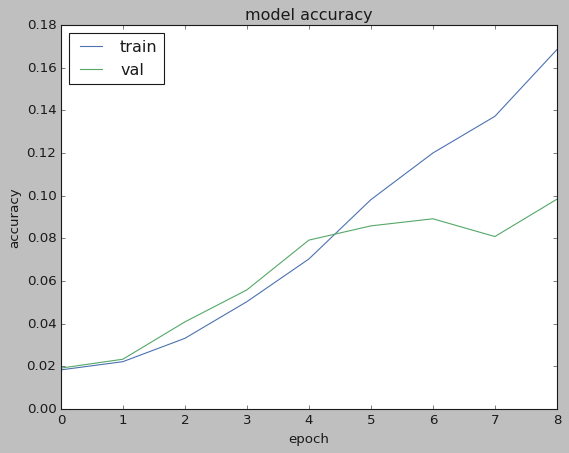

In [297]:
import keras
from matplotlib import pyplot as plt
import matplotlib.style
matplotlib.style.use('classic')
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy.png', dpi=None, bbox_inches = 'tight', pad_inches = 0.3)


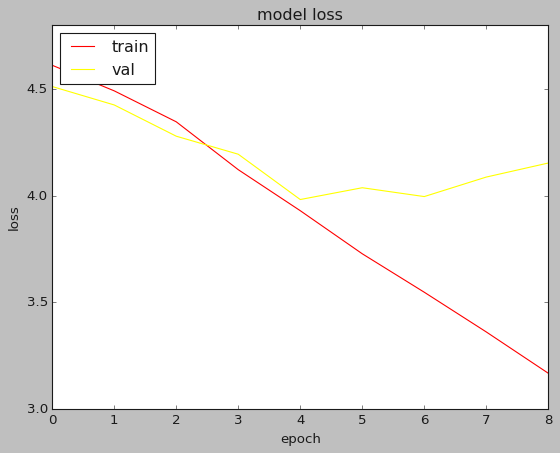

In [298]:
plt.plot(history['loss'], color="red")
plt.plot(history['val_loss'], color="yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss.png', dpi=None, bbox_inches = 'tight', pad_inches = 0.3)

### 3- Certain Model Figures

The figures depend on certain saved models. If you want to change those models, go back to the first cell of the first section in this file.

##### a) Genre Precision & Recall Plots

In [299]:
def metric_extractor(model_type):
    genre_precision_dict = dict()
    genre_recall_dict = dict()
    for file in model_type:
        class_based_scores_table = prediction("character", "genre", file)[2]
        genres = list(class_based_scores_table.index.values)
        for genre in genres:
            try:
                pr = class_based_scores_table["Precision"][genre]
                re = class_based_scores_table["Recall"][genre]
                genre_precision_dict[genre].append(pr)
                genre_recall_dict[genre].append(re)
            except:
                genre_precision_dict[genre] = list()
                genre_recall_dict[genre] = list()
                pr = class_based_scores_table["Precision"][genre]
                re = class_based_scores_table["Recall"][genre]
                genre_precision_dict[genre].append(pr)
                genre_recall_dict[genre].append(re)
    return genre_precision_dict, genre_recall_dict
    

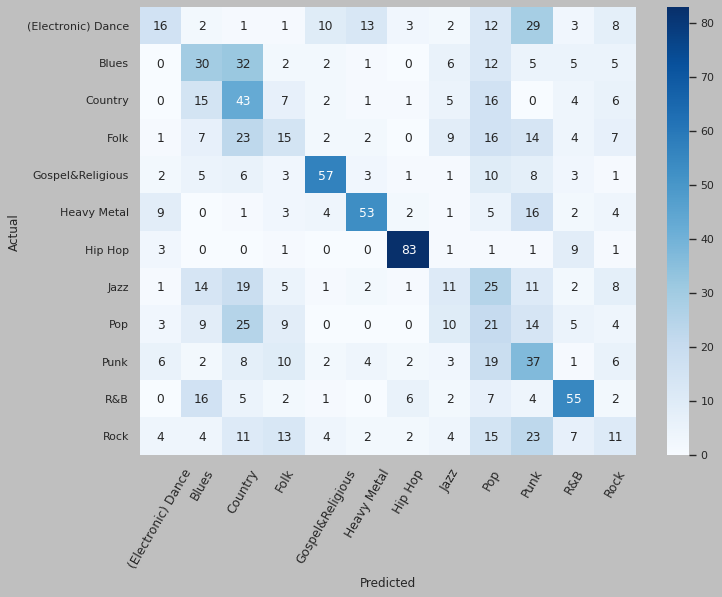

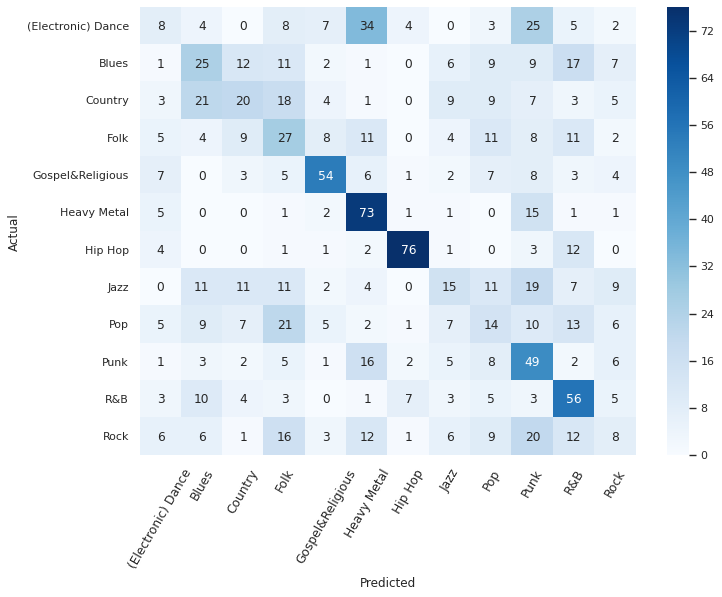

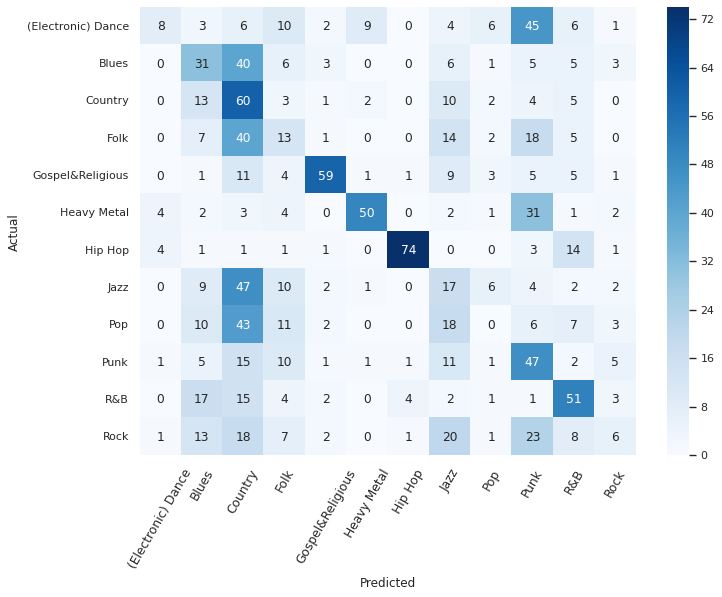

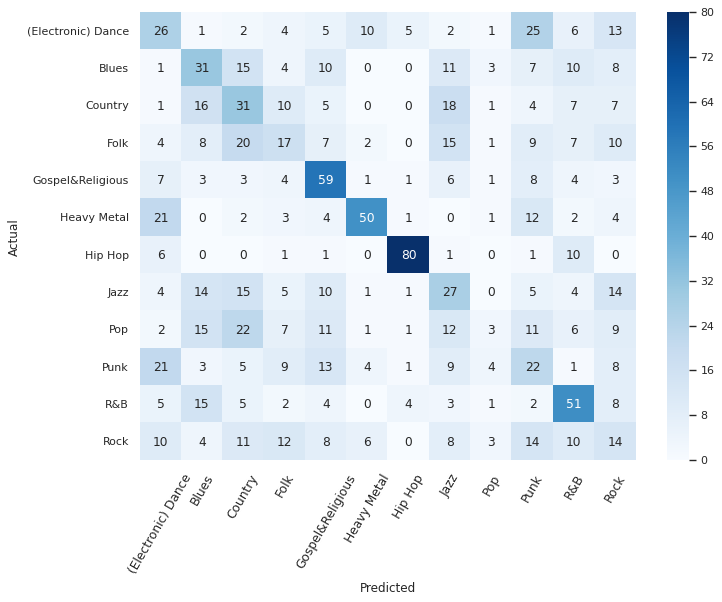

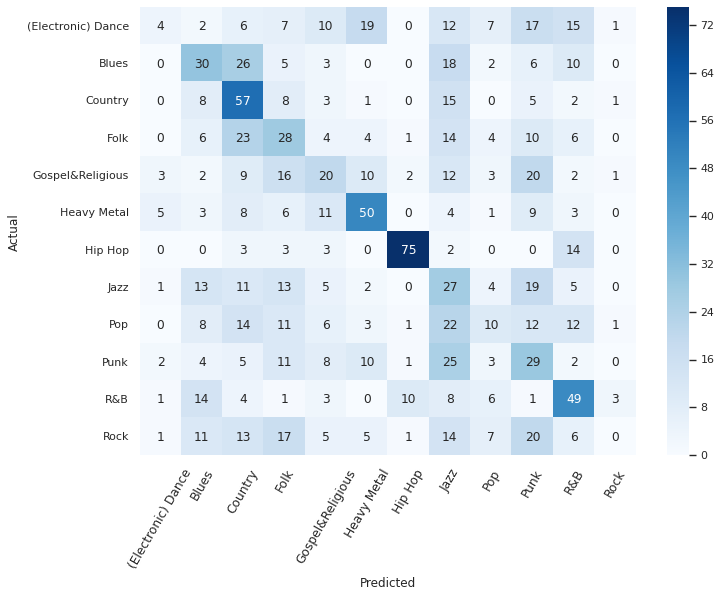

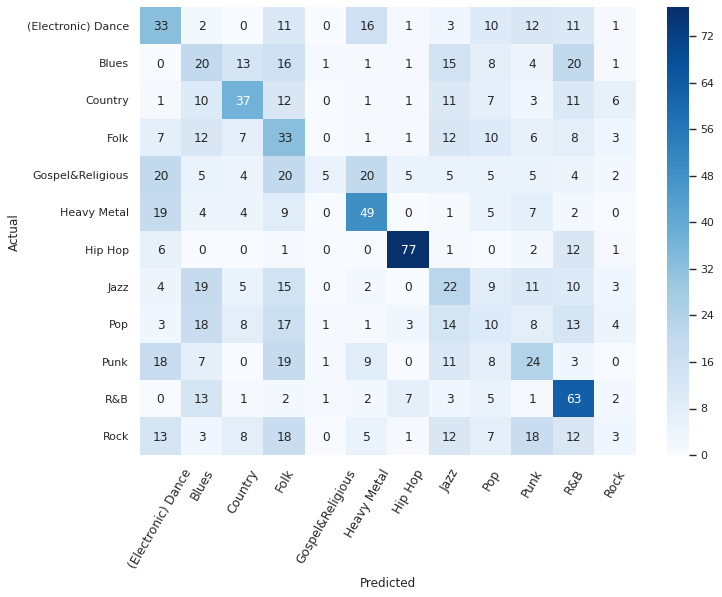

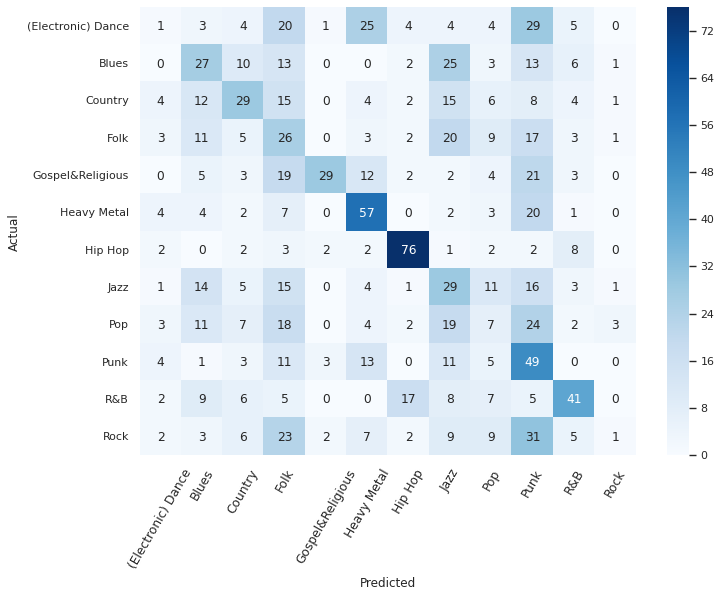

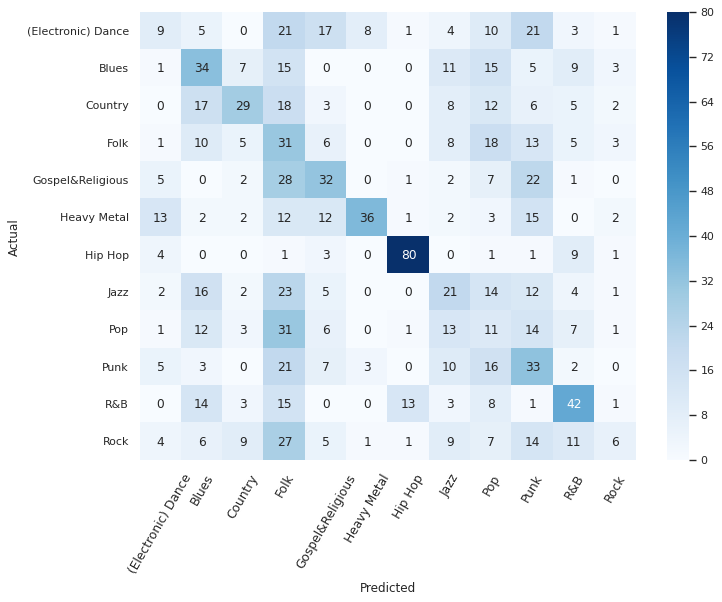

In [300]:
subword_genre_precision_dict, subword_genre_recall_dict = metric_extractor(sub_word_models_genre)
character_genre_precision_dict, character_genre_recall_dict = metric_extractor(character_models_genre)

In [317]:
import matplotlib.gridspec as gridspec
import numpy as np

def plotter(metric_type1, metric_type2):
    
    # set the title and legend names
    if metric_type1 == character_genre_precision_dict:
        main_title = "Precision Values Per Genre Label"
        l1 = "with char. embedding"
        l2 = "with sub-word embed."
        ylabel = "Precision"
    elif metric_type1 == subword_genre_precision_dict:
        main_title = "Precision Values Per Genre Label"
        l2 = "with char. embedding"
        l1 = "with sub-word embed."
        ylabel = "Precision"
    elif metric_type1 == character_genre_recall_dict:
        main_title = "Recall Values Per Genre Label"
        l1 = "with char. embedding"
        l2 = "with sub-word embed."
        ylabel = "Recall"
    elif metric_type1 == subword_genre_recall_dict:
        main_title = "Recall Values Per Genre Label"
        l2 = "with char. embedding"
        l1 = "with sub-word embed."
        ylabel = "Recall"

    
    # construct the plot outline of the figure
    fig1 = plt.figure(constrained_layout=True, figsize=(30,10))
    fig1.suptitle(main_title, fontsize=24, y= 1.05)
    spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig1)
    ax11 = fig1.add_subplot(spec[0, 0])
    ax12 = fig1.add_subplot(spec[0, 1])
    ax13 = fig1.add_subplot(spec[0, 2])
    ax14 = fig1.add_subplot(spec[0, 3])
    ax15 = fig1.add_subplot(spec[0, 4])
    ax16 = fig1.add_subplot(spec[0, 5])
    ax21 = fig1.add_subplot(spec[1, 0])
    ax22 = fig1.add_subplot(spec[1, 1])
    ax23 = fig1.add_subplot(spec[1, 2])
    ax24 = fig1.add_subplot(spec[1, 3])
    ax25 = fig1.add_subplot(spec[1, 4])
    ax26 = fig1.add_subplot(spec[1, 5])

    axes_names = [ax11, ax12, ax13, ax14, ax15, ax16, ax21, ax22, ax23, ax24, ax25, ax26]
    
    spec.update(wspace = 0.5, hspace = 0.5)

    # put data points
    for axes, genre in zip(axes_names, list(metric_type1.keys())):
        axes.plot(["M1", "M2", "M3", "M4"], metric_type1[genre], color='lightblue', linewidth=3, marker='o', linestyle = "--", label=l1) 
        axes.plot(["M1", "M2", "M3", "M4"], metric_type2[genre], color='red', linewidth=1, marker="P", linestyle = "-", label=l2) 
        axes.set_xticklabels(["M1", "M2", "M3", "M4"])
        axes.set(title=genre, ylabel=ylabel)
        axes.set_ylim(0.0, 1.0)
        axes.yaxis.set_ticks(np.arange(0, 1, 0.1))
        axes.legend([l1,l2])
        axes.set_facecolor('white')

    # save the final output to a png file
    plt.savefig(main_title+'.png',bbox_inches='tight')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


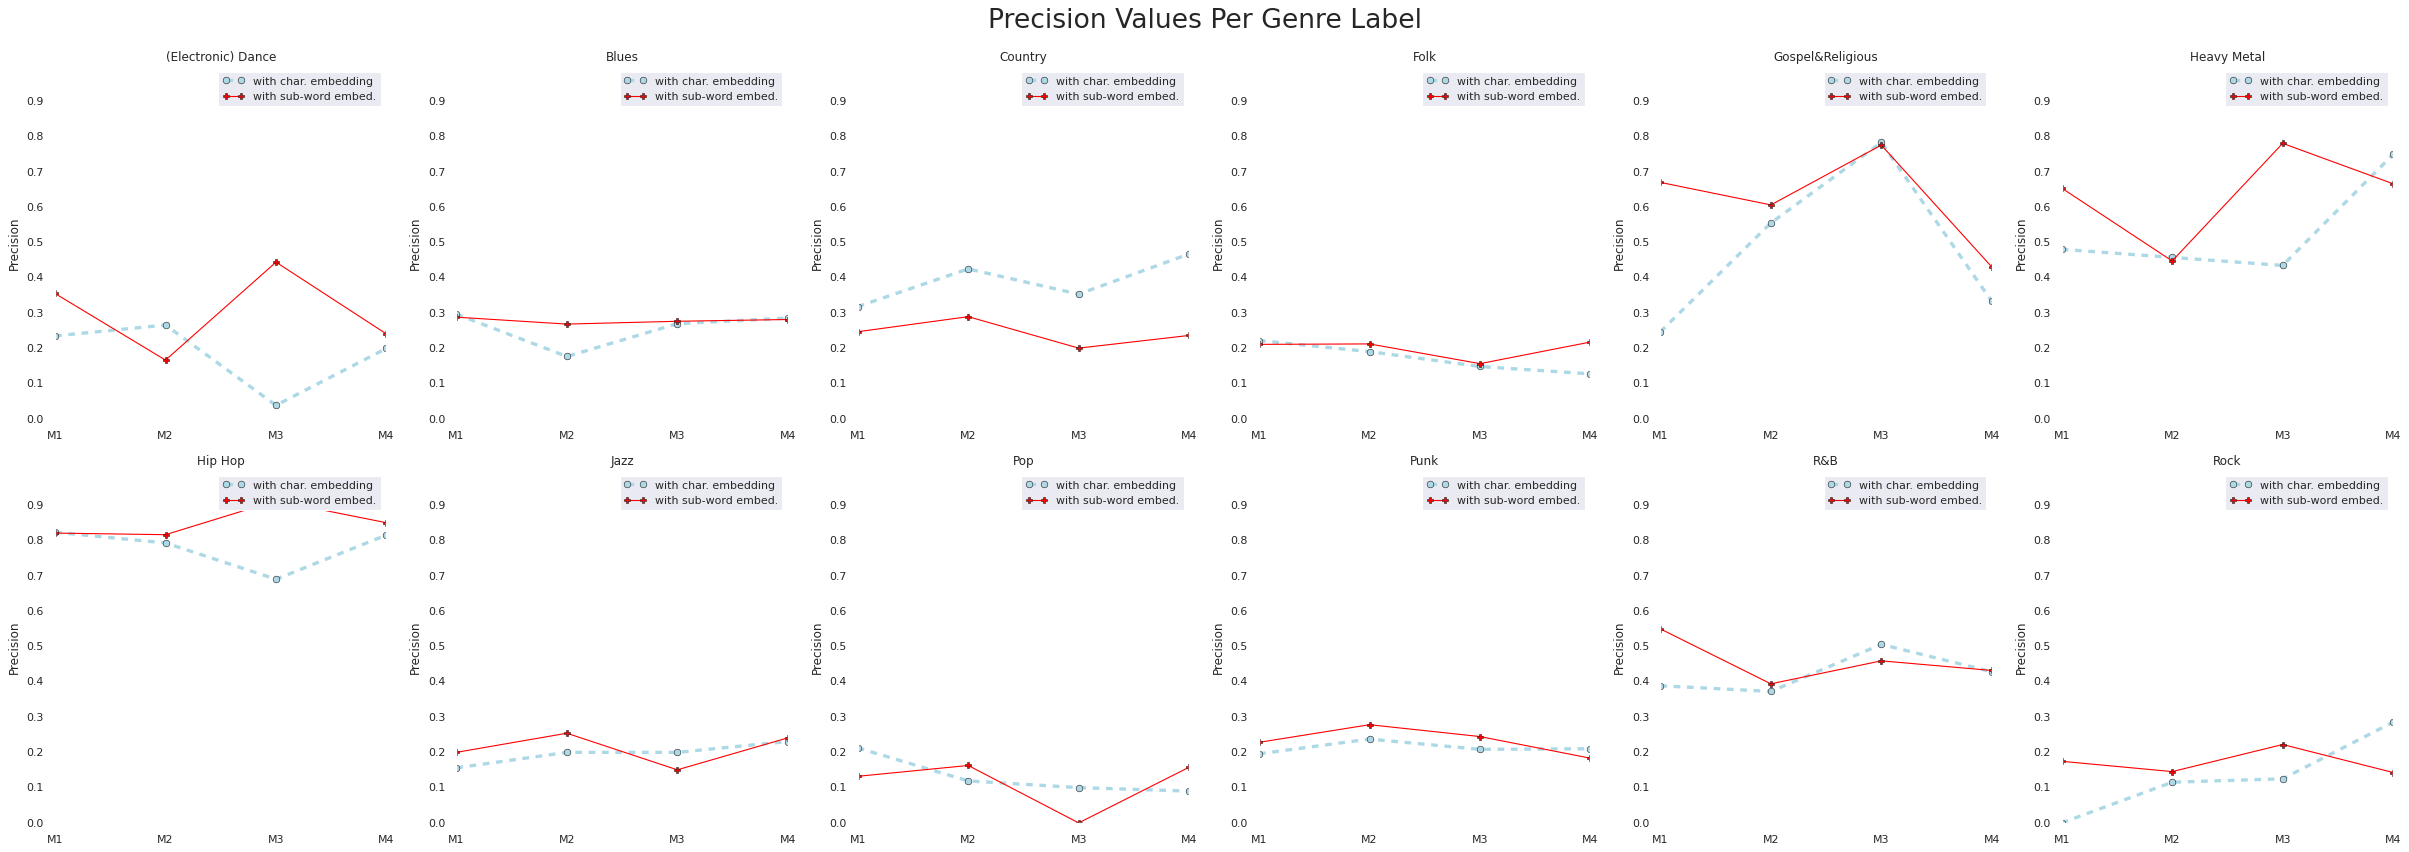

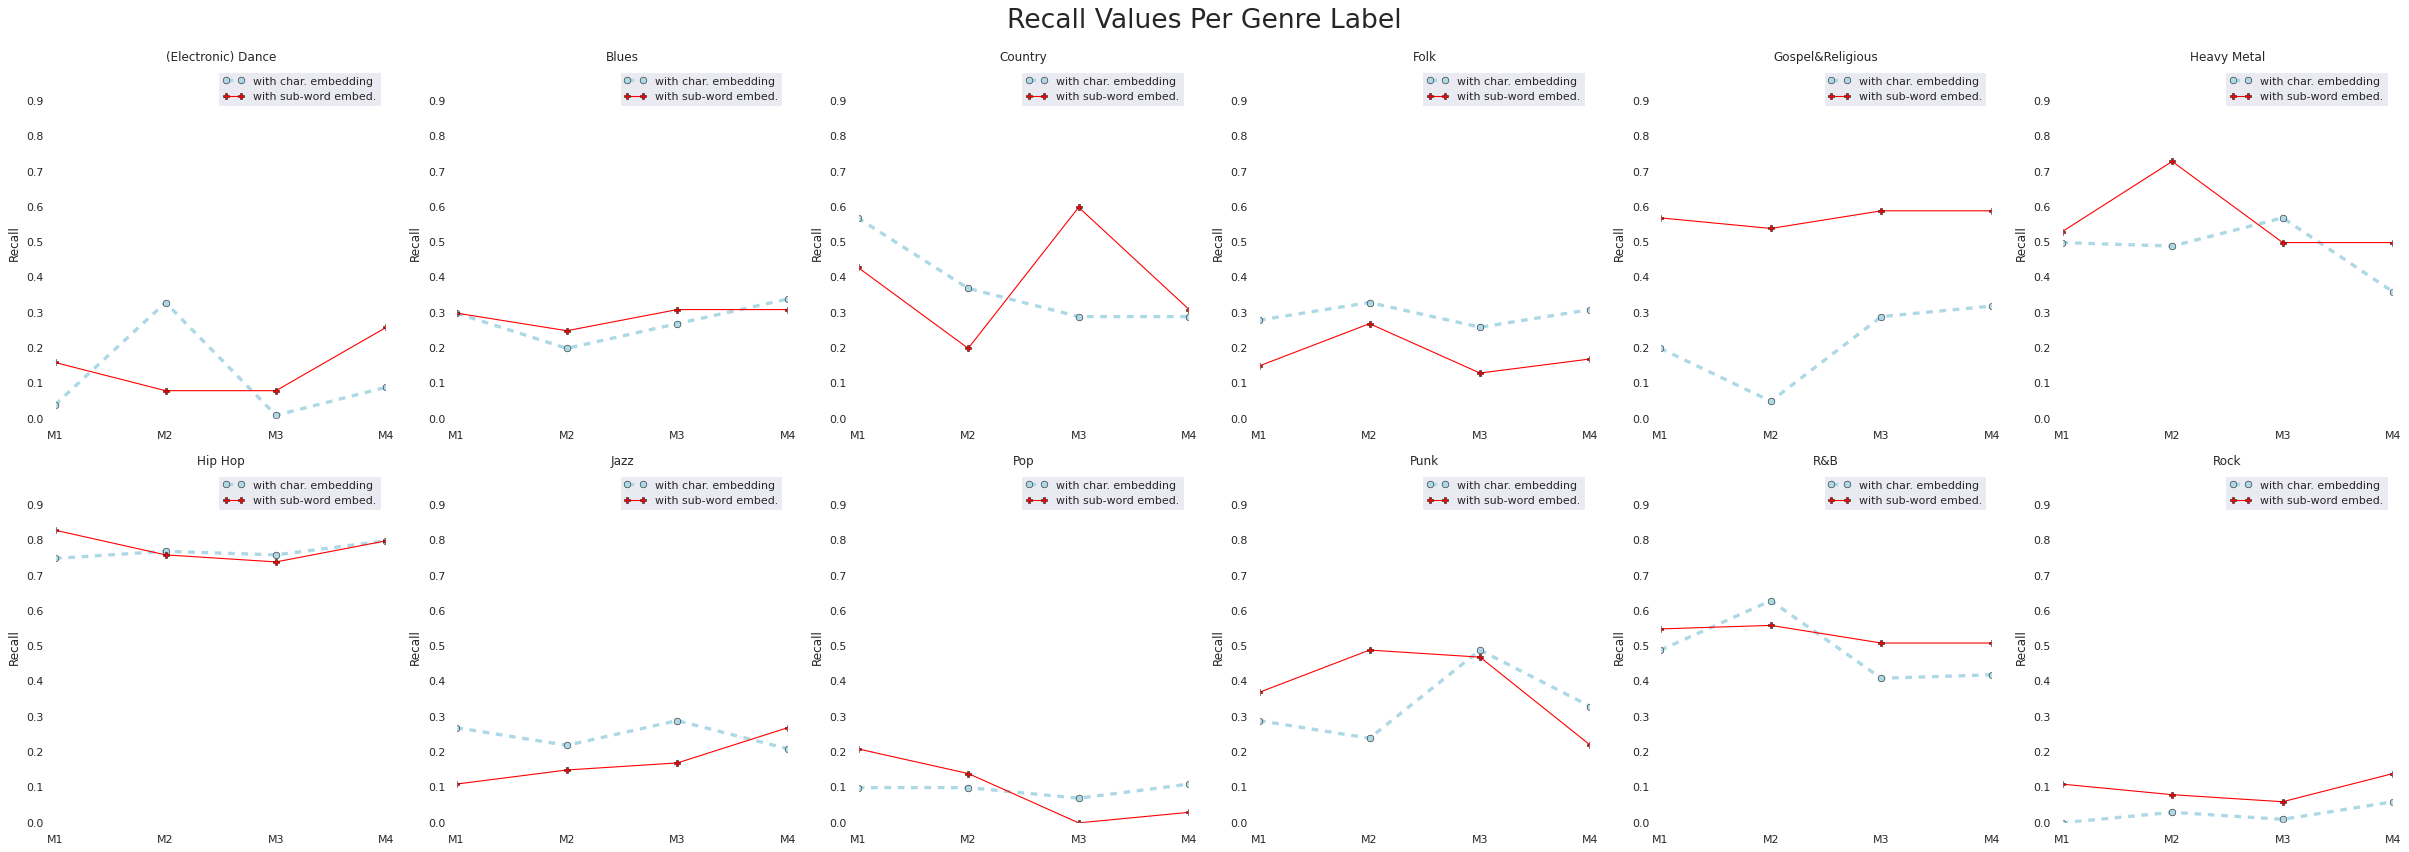

In [359]:
plotter(character_genre_precision_dict, subword_genre_precision_dict)
plotter(character_genre_recall_dict, subword_genre_recall_dict)


##### b) Test Accuracy Results - How They Coincide?

In [365]:
def accuracy_comparison(label_type):
    if label_type not in ["genre", "artist"]: # depending on the output type of the model, we need either 'genre' or 'artist' for this argument
        raise ValueError('argument "label_type" must be either "genre" or "artist"')
        
    if label_type == "genre":
        predictions1 = readPickle("predictions/"+sub_word_models_genre[0])
        predictions2 = readPickle("predictions/"+character_models_genre[0])
        label_dictionary = readPickle(str("id2"+"genre"))
        test_labels = readPickle("sub_word/y_te_genre_equal")
    else:
        predictions1 = readPickle("predictions/"+sub_word_models_artist[0])
        predictions2 = readPickle("predictions/"+character_models_artist[0])
        label_dictionary = readPickle(str("id2"+"artist"))
        test_labels = readPickle("sub_word/y_te_artist_equal")
        
    same_pred = 0 # both predictions are the same, regardless of their correctness
    all_true = 0 # both predictions and the test label are the same
    first_true = 0 # the first model prediction matches the actual test label
    second_true = 0 # the second model prediction matches the actual test label
    only_first_true = 0 # ONLY the first model prediction matches the actual test label
    only_second_true = 0 # ONLY the second model prediction matches the actual test label

    for a, b, c in zip(np.argmax(predictions1, axis=-1),np.argmax(predictions2, axis=-1),np.argmax(test_labels, axis=-1)):
        first_model = label_dictionary[a+1]
        second_model = label_dictionary[b+1]
        test_set = label_dictionary[c+1]
        if first_model == second_model:
            same_pred +=1
        if first_model == second_model == test_set:
            all_true +=1
        if first_model == test_set:
            first_true +=1
        if second_model == test_set:
            second_true +=1
        if first_model == test_set and second_model != test_set:
            only_first_true += 1
        if first_model != test_set and second_model == test_set:
            only_second_true += 1


    print(same_pred, "times both models yield the same label.", all_true, "of these predictions are actually true.")  
    print(first_true, "times the first model prediction is true.", only_first_true, "of these correct predictions are unique to the first model (i.e the second model cannot correctly predict these labels).")
    print(second_true, "times the second model prediction is true.", only_second_true, "of these correct predictions are unique to the second model (i.e the first model cannot correctly predict these labels).")        



In [367]:
accuracy_comparison('genre')
#accuracy_comparison('artist')

404 times both models yield the same label. 237 of these predictions are actually true.
432 times the first model prediction is true. 195 of these correct predictions are unique to the first model (i.e the second model cannot correctly predict these labels).
379 times the second model prediction is true. 142 of these correct predictions are unique to the second model (i.e the first model cannot correctly predict these labels).


##### c) When a model classifies a label, how certain is it with its prediction?

In [399]:
predictions1 = readPickle(str("predictions/"+sub_word_models_genre[0]))
predictions2 = readPickle(str("predictions/"+character_models_genre[0]))


# comment/uncomment below depending on the label type
label_dictionary = readPickle(str("id2"+"genre"))
test_labels = readPickle("sub_word/y_te_genre_equal")
#label_dictionary = readPickle(str("id2"+"artist"))
#test_labels = readPickle("sub_word/y_te_artist_equal")

In [400]:
pre1_correct = {}
pre1_incorrect = {}
pre2_correct = {}
pre2_incorrect = {}
for l in list(label_dictionary.values()):
    pre1_correct[l] = list()
    pre1_incorrect[l] = list()
    pre2_correct[l] = list()
    pre2_incorrect[l] = list()    
    
for pred1,t_label in zip(predictions1, test_labels):
    pred_label = np.argmax(pred1, axis=-1)
    label = np.argmax(t_label, axis=-1)
    correct = False
    if pred_label == label:
        correct = True
    if correct:
        pre1_correct[label_dictionary[label+1]].append(pred1[pred_label])
        #print(label_dictionary[pred_label+1],label_dictionary[label+1],pred1[pred_label])
    else:
        pre1_incorrect[label_dictionary[label+1]].append(pred1[pred_label])
        
for pred2,t_label in zip(predictions2, test_labels):
    pred_label = np.argmax(pred2, axis=-1)
    label = np.argmax(t_label, axis=-1)
    correct = False
    if pred_label == label:
        correct = True
    if correct:
        pre2_correct[label_dictionary[label+1]].append(pred2[pred_label])
        #print(label_dictionary[pred_label+1],label_dictionary[label+1],pred2[pred_label])
    else:
        pre2_incorrect[label_dictionary[label+1]].append(pred2[pred_label])

In [401]:
import pandas as pd
certainty = pd.DataFrame(columns=list(label_dictionary.values()), index=range(4))
certainty = certainty.rename(index=dict(zip(range(4),("Pred1_True","Pred1_False","Pred2_True","Pred2_False"))))

In [407]:
for genre, scores in pre1_correct.items():
    certainty.loc['Pred1_True', genre] = '{:10.2f}'.format(sum(scores)/(len(scores)+0.00001))+", (x"+str(len(scores))+")"
for genre, scores in pre1_incorrect.items():
    certainty.loc['Pred1_False', genre] = '{:10.2f}'.format(sum(scores)/(len(scores)+0.00001))+", (x"+str(len(scores))+")"
for genre, scores in pre2_correct.items():
    certainty.loc['Pred2_True', genre] = '{:10.2f}'.format(sum(scores)/(len(scores)+0.00001))+", (x"+str(len(scores))+")"
for genre, scores in pre2_incorrect.items():
    certainty.loc['Pred2_False', genre] = '{:10.2f}'.format(sum(scores)/(len(scores)+0.00001))+", (x"+str(len(scores))+")"

In [408]:
certainty

,(Electronic) Dance,Blues,Country,Folk,Gospel&Religious,Heavy Metal,Hip Hop,Jazz,Pop,Punk,R&B,Rock
Pred1_True,"0.60, (x16)","0.58, (x30)","0.41, (x43)","0.41, (x15)","0.89, (x57)","0.93, (x53)","0.98, (x83)","0.27, (x11)","0.30, (x21)","0.47, (x37)","0.79, (x55)","0.31, (x11)"
Pred1_False,"0.47, (x84)","0.35, (x70)","0.40, (x57)","0.39, (x85)","0.41, (x43)","0.51, (x47)","0.63, (x17)","0.40, (x89)","0.38, (x79)","0.37, (x63)","0.49, (x45)","0.43, (x89)"
Pred2_True,"0.47, (x4)","0.41, (x30)","0.74, (x57)","0.27, (x28)","0.46, (x20)","0.64, (x50)","0.96, (x75)","0.26, (x27)","0.16, (x10)","0.22, (x29)","0.66, (x49)","0.00, (x0)"
Pred2_False,"0.32, (x96)","0.33, (x70)","0.28, (x43)","0.36, (x72)","0.30, (x80)","0.30, (x50)","0.44, (x25)","0.32, (x73)","0.30, (x90)","0.30, (x71)","0.41, (x51)","0.30, (x100)"


##### d) For each prediction, a small log that shows what is the actual label, what is the best guess and the second best guess with probabilities

In [409]:
for i,lab in zip(predictions1, test_labels):
    print("Target:", label_dictionary[np.argmax(lab, axis=-1)+1])
    print("Best guess", label_dictionary[np.argsort(i)[-1]+1],"with", i[np.argsort(i)[-1]])
    print("Second guess", label_dictionary[np.argsort(i)[-2]+1],"with", i[np.argsort(i)[-2]], "\n")


Target: Folk
Best guess Jazz with 0.26154536
Second guess Country with 0.24038202 

Target: Folk
Best guess Punk with 0.3684241
Second guess Gospel&Religious with 0.30825984 

Target: Folk
Best guess Country with 0.32697263
Second guess Blues with 0.29014266 

Target: Folk
Best guess Jazz with 0.23142394
Second guess Country with 0.21288034 

Target: Folk
Best guess Jazz with 0.25693482
Second guess Pop with 0.2463773 

Target: Folk
Best guess Gospel&Religious with 0.4725828
Second guess (Electronic) Dance with 0.14485346 

Target: (Electronic) Dance
Best guess Punk with 0.43479732
Second guess (Electronic) Dance with 0.34458902 

Target: Folk
Best guess Rock with 0.26578593
Second guess Punk with 0.16196187 

Target: Gospel&Religious
Best guess Punk with 0.45879954
Second guess (Electronic) Dance with 0.2563375 

Target: (Electronic) Dance
Best guess Heavy Metal with 0.43929887
Second guess (Electronic) Dance with 0.3882719 

Target: Gospel&Religious
Best guess Gospel&Religious with 0